# TSNE Visualization

I have created and used the following pickle objects from the original notebook.
* **bow.pkl** - unigram bow (364171,72178)
* **tfidf.pkl** - unigram tfidf (364171,72178)
* **avg_w2v.pkl** - sentence vectors (364171,50)
* **tfidf_w2v.pkl** - weighted sentence vectors (364171,50)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import sqlite3
import pickle
import os
import datetime

# Sample Data Points
We will sample 8k points from our **reviews** dataframe such that we have 4k positive points and 4k negative points

In [12]:
conn = sqlite3.connect('final.sqlite')
review = pd.read_sql_query(""" SELECT * FROM Reviews """, conn)
conn.close()

In [13]:
print('Shape of our review Dataframe : {}'.format(review.shape))

pos_review = review[review['Score']=='positive'] # select positive reviews
pos_review = pos_review.sample(4000,random_state=42) # sample 4k points from positive reviews
pos_idx = list(pos_review.index)

neg_review = review[review['Score']=='negative'] # select negative reviews
neg_review = neg_review.sample(4000, random_state=42) # sample 4k points fro negative reviews
neg_idx = list(neg_review.index)

idx = pos_idx + neg_idx
np.random.seed(42)
idx = np.random.permutation(idx)

score = review.loc[idx]['Score'].values
del review # To free up the RAM

Shape of our review Dataframe : (364171, 11)


# Visualize Bag of words

In [2]:
if os.path.isfile('./pickle_files/bow.pkl'):
    with open('./pickle_files/bow.pkl', 'rb') as f:
        bow_matrix = pickle.load(f)

print('Shape of bow matrx : {}'.format(bow_matrix.get_shape()))

Shape of bow matrx : (364171, 72178)


In [112]:
# Apply svd
svd = TruncatedSVD(n_components=150,n_iter=20)
bow_svd = svd.fit_transform(bow_matrix)
total_explained_variance = sum(svd.explained_variance_ratio_)
print('Shape after applying SVD : {}'.format(bow_svd.shape))
print('Total percenage variance explained : {}'.format(sum(svd.explained_variance_ratio_)))

# Select 8k points
bow_svd = bow_svd[idx]

# Standardize points
bow_svd = StandardScaler().fit_transform(bow_svd)
print('Size of sampled points : {}'.format(bow_svd.shape))

Shape after applying SVD : (364171, 150)
Total percenage variance explained : 0.5001217812372197
Size of sampled points : (8000, 150)


[t-SNE] Computing 100 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.206s...
[t-SNE] Computed neighbors for 8000 samples in 25.010s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 2.132098
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.315140
[t-SNE] Error after 1500 iterations: 3.471177


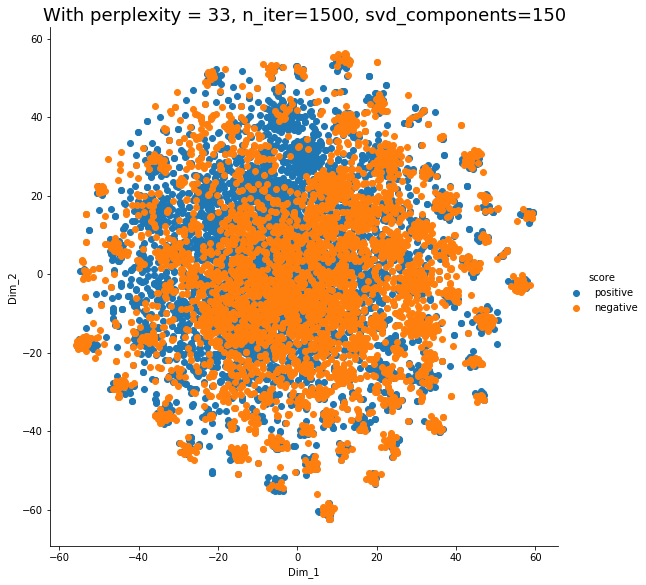

Time taken : 0:05:39.385461


In [113]:
# Applying TSNE
start = datetime.datetime.now()

# Initialising TSNE
model = TSNE(n_components=2, perplexity=33, verbose=1, n_iter=1500, random_state=0)
tsne_data = model.fit_transform(bow_svd)

# adding score
tsne_data = np.hstack((tsne_data, score[:,np.newaxis]))

# Create a dataframe
tsne_df = pd.DataFrame(tsne_data, columns=['Dim_1', 'Dim_2', 'score'])

# Plotting the results of tsne.
sns.FacetGrid(tsne_df,hue='score', height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 33, n_iter=1500, svd_components=150', fontsize=18)
plt.show()
print('Time taken : {}'.format(datetime.datetime.now() - start))

# Visualise TF-IDF

In [3]:
if os.path.isfile('./pickle_files/tfidf.pkl'):
    with open('./pickle_files/tfidf.pkl', 'rb') as f:
        tfidf_matrix = pickle.load(f)

print('Shape of tfidf matrx : {}'.format(tfidf_matrix.get_shape()))

Shape of tfidf matrx : (364171, 72178)


In [10]:
# Apply svd
svd = TruncatedSVD(n_components=500,n_iter=20)
tfidf_svd = svd.fit_transform(tfidf_matrix)
total_explained_variance = sum(svd.explained_variance_ratio_)
print('Shape after applying SVD : {}'.format(tfidf_svd.shape))
print('Total percenage variance explained : {}'.format(sum(svd.explained_variance_ratio_)))

# Select 8k points
tfidf_svd = tfidf_svd[idx]

# Standardize points
tfidf_svd = StandardScaler().fit_transform(tfidf_svd)
print('Size of sampled points : {}'.format(tfidf_svd.shape))

Shape after applying SVD : (364171, 500)
Total percenage variance explained : 0.48146462220853264
Size of sampled points : (8000, 500)


[t-SNE] Computing 100 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.339s...
[t-SNE] Computed neighbors for 8000 samples in 79.010s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 4.774020
[t-SNE] KL divergence after 250 iterations with early exaggeration: 147.402054
[t-SNE] Error after 1500 iterations: 4.012761


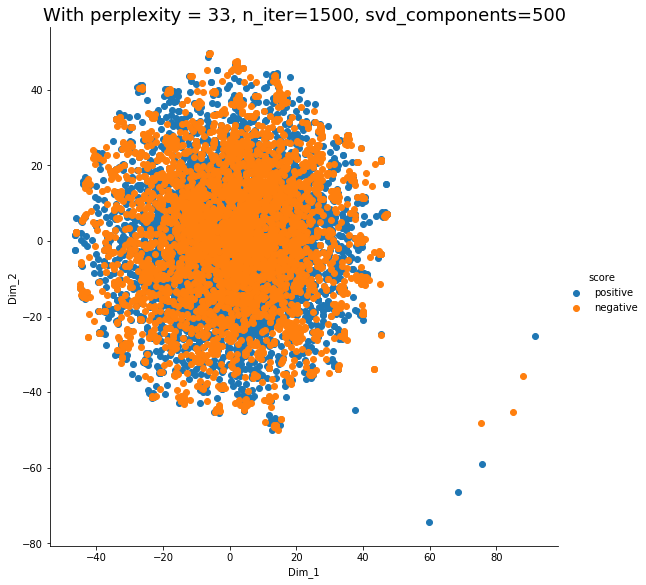

Time taken : 0:07:22.112093


In [11]:
# Applying TSNE
start = datetime.datetime.now()

# Initialising TSNE
model = TSNE(n_components=2, perplexity=33, verbose=1, n_iter=1500, random_state=0)
tsne_data = model.fit_transform(tfidf_svd)

# adding score
tsne_data = np.hstack((tsne_data, score[:,np.newaxis]))

# Create a dataframe
tsne_df = pd.DataFrame(tsne_data, columns=['Dim_1', 'Dim_2', 'score'])

# Plotting the results of tsne.
sns.FacetGrid(tsne_df,hue='score', height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 33, n_iter=1500, svd_components=500', fontsize=18)
plt.show()
print('Time taken : {}'.format(datetime.datetime.now() - start))

# Visualise AVG-W2V

In [32]:
if os.path.isfile('./pickle_files/avg_w2v.pkl'):
    with open('./pickle_files/avg_w2v.pkl', 'rb') as f:
        avg_w2v_matrix = pickle.load(f)

print(type(avg_w2v_matrix))
print(len(avg_w2v_matrix))
print()

avg_w2v_matrix = np.array(avg_w2v_matrix)
print(type(avg_w2v_matrix))
print('Shape of avg_w2v_matrix : {}'.format(avg_w2v_matrix.shape))

<class 'list'>
364171

<class 'numpy.ndarray'>
Shape of avg_w2v_matrix : (364171, 50)


In [28]:
#Select 8k points
avg_w2v_matrix = avg_w2v_matrix[idx]

# Standardize points
avg_w2v_matrix = StandardScaler().fit_transform(avg_w2v_matrix)
print('Size of sampled points : {}'.format(avg_w2v_matrix.shape))

Size of sampled points : (8000, 50)


[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.024s...
[t-SNE] Computed neighbors for 8000 samples in 9.044s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 1.774474
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.314522
[t-SNE] Error after 1500 iterations: 2.536362


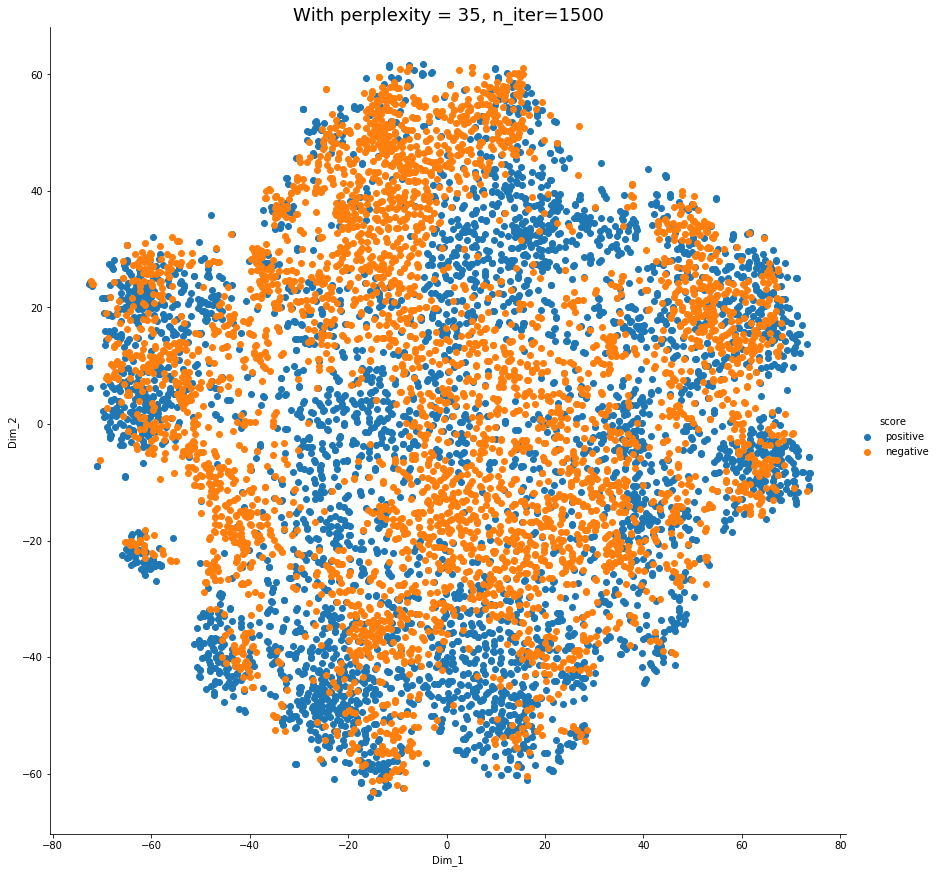

Time taken : 0:05:03.507823


In [20]:
# Applying TSNE
start = datetime.datetime.now()

# Initialising TSNE
model = TSNE(n_components=2, perplexity=35, verbose=1, n_iter=1500, random_state=0)
tsne_data = model.fit_transform(avg_w2v_matrix)

# adding score
tsne_data = np.hstack((tsne_data, score[:,np.newaxis]))

# Create a dataframe
tsne_df = pd.DataFrame(tsne_data, columns=['Dim_1', 'Dim_2', 'score'])

# Plotting the results of tsne.
sns.FacetGrid(tsne_df,hue='score', height=12).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 35, n_iter=1500', fontsize=18)
plt.show()
print('Time taken : {}'.format(datetime.datetime.now() - start))

# Visualize TFIDF - W2V

In [31]:
if os.path.isfile('./pickle_files/tfidf_w2v.pkl'):
    with open('./pickle_files/tfidf_w2v.pkl', 'rb') as f:
        tfidf_w2v_matrix = pickle.load(f)

print(type(tfidf_w2v_matrix))
print(len(tfidf_w2v_matrix))
print()

tfidf_w2v_matrix = np.array(tfidf_w2v_matrix)
print(type(tfidf_w2v_matrix))
print('Shape of tfidf_w2v_matrix : {}'.format(tfidf_w2v_matrix.shape))

<class 'list'>
364171

<class 'numpy.ndarray'>
Shape of tfidf_w2v_matrix : (364171, 50)


In [22]:
#Select 8k points
tfidf_w2v_matrix = tfidf_w2v_matrix[idx]

# Standardize points
tfidf_w2v_matrix = StandardScaler().fit_transform(tfidf_w2v_matrix)
print('Size of sampled points : {}'.format(tfidf_w2v_matrix.shape))

Size of sampled points : (8000, 50)


[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.022s...
[t-SNE] Computed neighbors for 8000 samples in 9.040s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 1.791333
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.261482
[t-SNE] Error after 1500 iterations: 2.254967


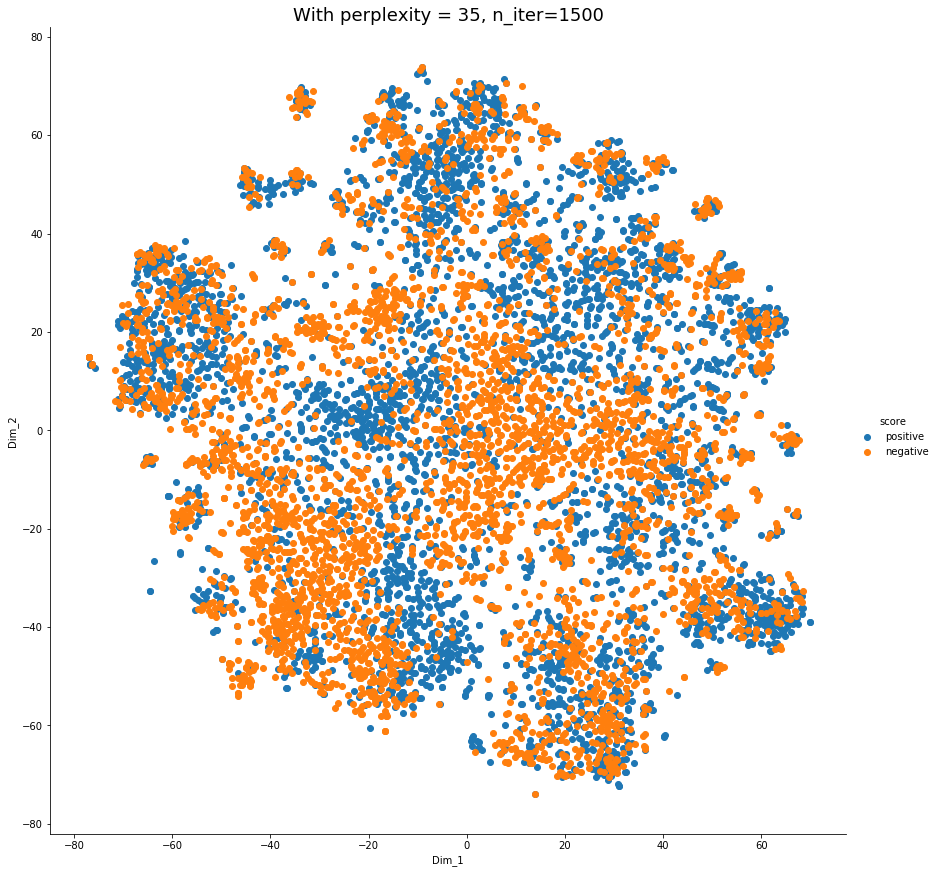

Time taken : 0:04:55.064456


In [23]:
# Applying TSNE
start = datetime.datetime.now()

# Initialising TSNE
model = TSNE(n_components=2, perplexity=35, verbose=1, n_iter=1500, random_state=0)
tsne_data = model.fit_transform(tfidf_w2v_matrix)

# adding score
tsne_data = np.hstack((tsne_data, score[:,np.newaxis]))

# Create a dataframe
tsne_df = pd.DataFrame(tsne_data, columns=['Dim_1', 'Dim_2', 'score'])

# Plotting the results of tsne.
sns.FacetGrid(tsne_df,hue='score', height=12).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 35, n_iter=1500', fontsize=18)
plt.show()
print('Time taken : {}'.format(datetime.datetime.now() - start))